# Predicting Stock Prices With Linear Regression

## Importing the required libraries



In [0]:
#install quandl for fetching the dataset
!pip install quandl

In [0]:
# make necessary imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import quandl
import datetime
style.use('ggplot')

## Getting the Data

We're predicting values for Apple's stock, using a dataset downloaded from Quandl, (https://www.quandl.com/data/EOD/AAPL-Apple-Inc-AAPL-Stock-Prices-Dividends-and-Splits).

In [0]:
#Dates
start_date = datetime.date(2017,1,3)
end_date = datetime.date.today()

quandl.ApiConfig.api_key = "[not_shown]"

#Get Data From Quandl
df = quandl.get('EOD/AAPL', start_date=start_date, end_date=end_date, collapse="daily")

df = df.reset_index()
prices = df['Close'].tolist()
dates = df.index.tolist()

#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

## Examining the dataset

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-01-03,115.80,116.3300,114.76,116.15,28781865.0,0.0,1.0,111.795662,112.307334,110.791625,112.133559,28781865.0
1,2017-01-04,115.85,116.5100,115.75,116.02,21118116.0,0.0,1.0,111.843933,112.481110,111.747391,112.008054,21118116.0
2,2017-01-05,115.92,116.8642,115.81,116.61,22193587.0,0.0,1.0,111.911512,112.823062,111.805316,112.577652,22193587.0
3,2017-01-06,116.78,118.1600,116.47,117.91,31751900.0,0.0,1.0,112.741773,114.074053,112.442493,113.832698,31751900.0
4,2017-01-09,117.95,119.4300,117.94,118.99,33561948.0,0.0,1.0,113.871315,115.300137,113.861661,114.875352,33561948.0


In [19]:
df.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,553.000000,553.000000,553.000000,553.000000,5.530000e+02,553.000000,553.0,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,169.370962,170.816855,167.946151,169.437061,3.065366e+07,0.010868,1.0,166.636890,168.061880,165.231976,166.701172,3.065366e+07
std,25.314429,25.686094,24.902922,25.261052,1.343564e+07,0.084900,0.0,26.079245,26.462337,25.656141,26.026440,1.343564e+07
min,115.800000,116.330000,114.760000,116.020000,1.251979e+07,0.000000,1.0,111.795662,112.307334,110.791625,112.008054,1.251979e+07
25%,153.170000,153.980000,151.130000,153.070000,2.157112e+07,0.000000,1.0,149.516825,150.344337,148.348573,149.400000,2.157112e+07
50%,169.200000,170.780000,167.070000,169.080000,2.696079e+07,0.000000,1.0,166.724017,168.264215,165.183819,166.155027,2.696079e+07
75%,183.820000,184.940000,182.540000,183.920000,3.562767e+07,0.000000,1.0,182.034787,184.061791,180.858137,182.094114,3.562767e+07
max,230.780000,233.470000,229.780000,232.070000,1.119850e+08,0.730000,1.0,228.993813,231.662993,228.001553,230.273829,1.119850e+08


## Creating the regressor object

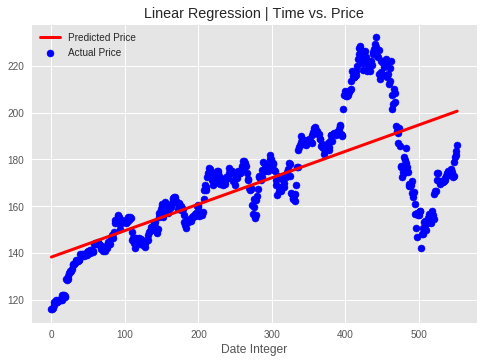

139.4105443796194 0.11288164323152237 138.28172794730418


In [15]:
#Define Linear Regressor Object
regressor = LinearRegression()
regressor.fit(dates, prices)

#Visualize Results
plt.scatter(dates, prices, color='blue', label= 'Actual Price') #plotting the initial datapoints
plt.plot(dates, regressor.predict(dates), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()

#Predict Price on Given Date
date = np.array(10)
date = date.reshape(-1, 1)

predicted_price =regressor.predict(date)
print(predicted_price[0][0],regressor.coef_[0][0] ,regressor.intercept_[0])

## Creating train/test sets

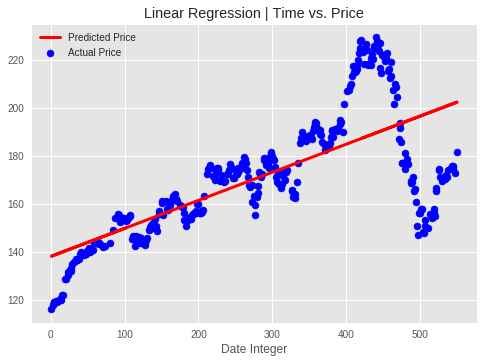

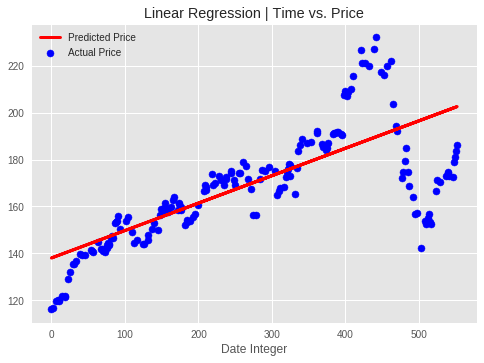

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(dates, prices, test_size=0.33, random_state=42)
regressor.fit(xtrain, ytrain)
 
#Train Set Graph
plt.scatter(xtrain, ytrain, color='blue', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtrain, regressor.predict(xtrain), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()
 
#Test Set Graph
plt.scatter(xtest, ytest, color='blue', label= 'Actual Price') #plotting the initial datapoints
plt.plot(xtest, regressor.predict(xtest), color='red', linewidth=3, label = 'Predicted Price') #plotting the line made by linear regression
plt.title('Linear Regression | Time vs. Price')
plt.legend()
plt.xlabel('Date Integer')
plt.show()